In [1]:
%config InteractiveShell.ast_node_interactivity="last_expr_or_assign"

# Day 9: Rewiring
The input for this problem is located at https://adventofcode.com/2021/day/9/input

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd

Load the problem

In [3]:
height = np.genfromtxt("input.txt", delimiter=1, dtype=np.uint8)

array([[7, 6, 5, ..., 3, 4, 5],
       [7, 5, 4, ..., 1, 2, 3],
       [5, 4, 3, ..., 0, 1, 2],
       ...,
       [3, 2, 3, ..., 9, 7, 8],
       [6, 3, 4, ..., 9, 8, 9],
       [5, 4, 7, ..., 0, 9, 9]], dtype=uint8)

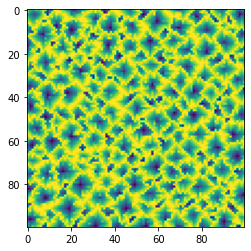

In [18]:
plt.imshow(height);

## Finding minima

In [4]:
minimum = nd.minimum_filter(
    height,
    mode="mirror",
    footprint=np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]),
)

array([[6, 5, 4, ..., 1, 2, 3],
       [5, 4, 3, ..., 0, 1, 2],
       [4, 3, 2, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 7, 6, 7],
       [3, 2, 3, ..., 0, 7, 8],
       [4, 3, 4, ..., 1, 0, 9]], dtype=uint8)

In [5]:
is_low = height < minimum

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [6]:
np.where(is_low)

(array([ 0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  3,  4,  4,  5,  5,  5,  5,
         7,  7,  7,  8,  8,  9,  9,  9,  9, 10, 10, 10, 11, 11, 11, 13, 14,
        14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 18, 19, 20, 21, 21, 21,
        22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 26, 26, 26, 27, 27, 28, 28,
        29, 29, 30, 31, 31, 31, 31, 32, 32, 33, 33, 34, 35, 35, 36, 36, 37,
        37, 37, 38, 38, 38, 38, 39, 41, 41, 41, 42, 43, 43, 43, 43, 44, 44,
        44, 45, 46, 47, 47, 48, 48, 48, 49, 49, 50, 50, 51, 51, 51, 51, 53,
        53, 54, 54, 55, 55, 55, 55, 57, 57, 58, 58, 58, 59, 60, 60, 62, 62,
        63, 63, 64, 64, 64, 65, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 68,
        68, 69, 69, 69, 70, 72, 72, 73, 73, 73, 73, 74, 74, 74, 74, 75, 75,
        75, 75, 77, 77, 78, 79, 79, 79, 80, 80, 80, 81, 81, 81, 82, 83, 84,
        84, 84, 85, 85, 86, 86, 86, 89, 89, 89, 90, 90, 90, 90, 91, 91, 92,
        93, 93, 94, 94, 95, 95, 96, 96, 96, 97, 99, 99, 99, 99, 99, 99, 99,
        99, 

In [7]:
risk = height[is_low] + 1

array([2, 4, 3, 4, 1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 2, 6, 1, 1,
       1, 5, 1, 2, 2, 7, 5, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 3, 3, 2, 5,
       2, 4, 1, 6, 1, 3, 1, 6, 1, 1, 1, 1, 5, 2, 1, 4, 4, 3, 4, 2, 4, 3,
       1, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 2, 3, 4, 1, 3, 1, 2, 1,
       1, 1, 5, 1, 1, 1, 1, 2, 1, 7, 4, 1, 1, 4, 3, 2, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 1, 6, 2, 3, 2, 3, 1, 2, 6, 1, 1, 3, 1, 3, 1, 1, 1, 4, 3,
       1, 1, 1, 4, 2, 1, 1, 4, 3, 6, 5, 1, 1, 4, 7, 5, 3, 5, 1, 1, 3, 3,
       5, 3, 1, 2, 5, 1, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 4, 2, 6, 1, 5,
       4, 4, 1, 1, 5, 1, 1, 2, 1, 2, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 4,
       1, 4, 1, 1, 1, 4, 2, 2, 4, 3, 1, 6, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1,
       2, 3, 1], dtype=uint8)

In [8]:
np.sum(risk)

516

## Finding basins

In [9]:
ix, jx = np.where(is_low)

Let's plot the locations

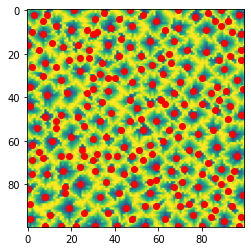

In [11]:
plt.imshow(height)
plt.scatter(jx, ix, color="red");

In [34]:
def neighbours(i, j, grid):
    n, m = grid.shape

    if i > 0:
        yield (i - 1, j)
    if i < n - 1:
        yield (i + 1, j)
    if j > 0:
        yield (i, j - 1)
    if j < m - 1:
        yield (i, j + 1)

In [35]:
def find_basin(i, j, height):
    open = set()
    closed = set()

    open.add((i, j))

    while open:
        i, j = open.pop()
        closed.add((i, j))

        y = height[i, j]

        for u, v in neighbours(i, j, height):
            if (u, v) in closed:
                continue

            y_uv = height[u, v]
            if y_uv < y or y_uv == 9:
                continue

            open.add((u, v))

    return closed

In [36]:
basin_size = np.zeros_like(risk, dtype=np.int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [38]:
for i in range(basin_size.size):
    basin = find_basin(ix[i], jx[i], height)
    basin_size[i] = len(basin)

In [16]:
k = np.argpartition(basin_size, -3)[-3:]

array([ 14, 128, 201])

In [17]:
basin_size[k].prod()

1023660